# Visualização de dados para tomada de decisão

![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1")

/home/bahbbc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
exchange = pd.read_csv('kaggle-survey-2017/conversionRates.csv', encoding="ISO-8859-1", low_memory=False)

In [4]:
df = pd.merge(left=df, right=exchange, how='left', 
              left_on='CompensationCurrency', right_on='originCountry')

In [5]:
df.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity', 'Unnamed: 0', 'originCountry',
       'exchangeRate'],
      dtype='object', length=231)

In [6]:
df.shape

(16716, 231)

## Histogramas

Transformar Age para inteiro para poder enxergar os numeros melhor

In [7]:
df['Age'] = df['Age'].fillna(0).astype(int)

Vamos ver um histograma da idade dos participantes

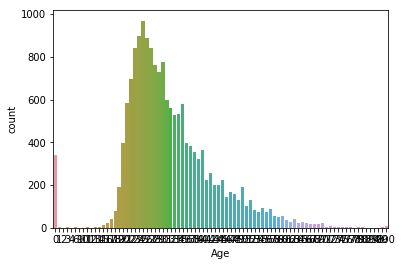

In [8]:
_ = sns.countplot(x = 'Age', data=df)

Ficou horrível...

Vamos adicionar o titulo e aumentar o gráfico

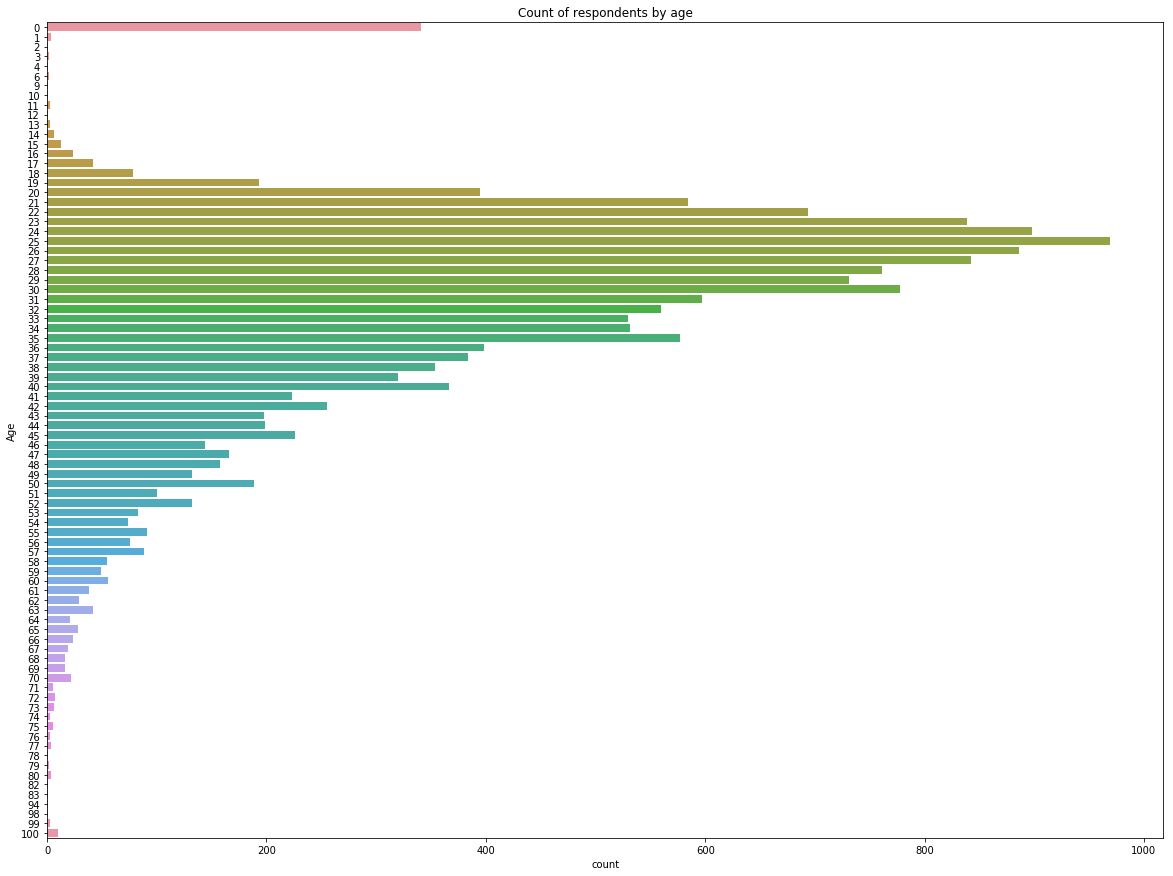

In [9]:
plt.subplots(figsize=(20,15))
plot = sns.countplot(y="Age", data=df).set_title("Count of respondents by age")

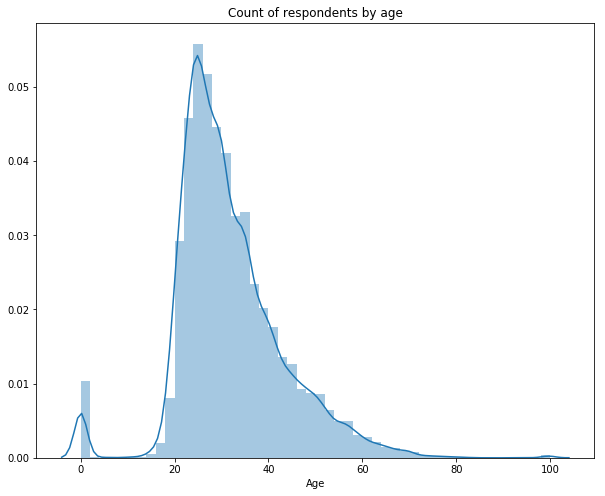

In [10]:
plt.subplots(figsize=(10,8))
_ = sns.distplot(df['Age']).set_title("Count of respondents by age")

Distplot não aceita Nulos

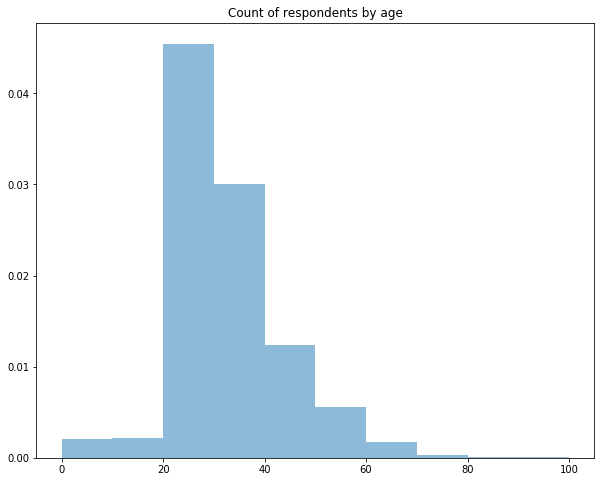

In [11]:
plt.subplots(figsize=(10,8))
_ = plt.hist(df['Age'], normed=True, alpha=0.5)
_ = plt.title("Count of respondents by age")

## Boxplot

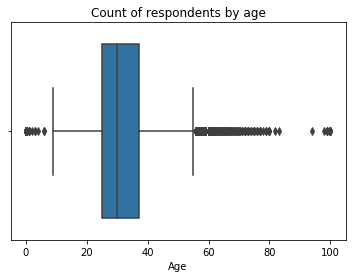

In [12]:
_ = sns.boxplot(df['Age']).set_title("Count of respondents by age")

In [13]:
money_index = df['CompensationAmount'].notnull()

In [14]:
compensation_check = df[money_index]

## Scatterplots (Dispersão)

In [15]:
df.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,Unnamed: 0,exchangeRate
count,16716.000000,13109.000000,13126.000000,13111.000000,13122.000000,13126.000000,13094.000000,7530.000000,7528.000000,7517.000000,7529.000000,7523.000000,7513.000000,4529.000000,4529.000000
mean,31.731814,33.366771,27.375514,15.217593,16.988607,5.531434,1.795940,36.144754,21.268066,10.806372,13.869372,13.094776,2.396247,7.075293,0.703953
std,11.307691,25.787181,26.860840,18.996778,23.676917,11.072680,9.357886,21.649591,16.165958,12.257932,11.722945,12.974846,12.157137,11.333361,0.486712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000030
25%,25.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,10.000000,0.000000,5.000000,5.000000,0.000000,1.000000,0.058444
50%,30.000000,30.000000,20.000000,10.000000,5.000000,0.000000,0.000000,35.000000,20.000000,10.000000,10.000000,10.000000,0.000000,2.000000,1.000000
75%,37.000000,50.000000,40.000000,25.000000,30.000000,10.000000,0.000000,50.000000,30.000000,15.000000,20.000000,20.000000,0.000000,7.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,86.000000,2.652053


In [16]:
compensation_check['GenderSelect'].value_counts()

Male                                                 4432
Female                                                725
A different identity                                   32
Non-binary, genderqueer, or gender non-conforming      29
Name: GenderSelect, dtype: int64

In [17]:
df['exchangeRate'] = df['exchangeRate'].fillna(0)
df['CompensationAmount'] = df['CompensationAmount'].fillna(0)

In [18]:
df['CompensationAmount'] = df.CompensationAmount.apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',',''))) 
df['CompensationAmount'] = df['CompensationAmount']*df['exchangeRate']
df = df[df['CompensationAmount']>0]

In [22]:
df['CompensationAmount'].describe()

count    4.333000e+03
mean     6.651893e+06
std      4.298948e+08
min      6.000000e-02
25%      2.152487e+04
50%      5.390140e+04
75%      9.627720e+04
max      2.829740e+10
Name: CompensationAmount, dtype: float64

In [ ]:
sns.regplot(x="CompensationAmount", y="tip", data=tips)

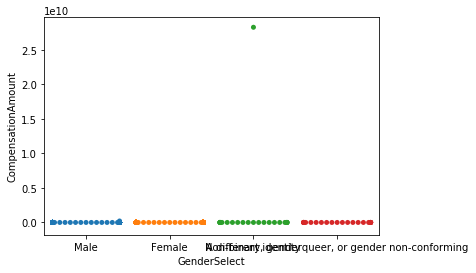

In [20]:
sns.swarmplot(x="GenderSelect", y="CompensationAmount", data=df)

In [21]:
f = {'CompensationAmount':['median','count']}


temp_df = df.groupby('GenderSelect').agg(f).sort_values(by=[('CompensationAmount','median')], ascending=False)